In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('./iris.csv')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.shape

(150, 6)

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

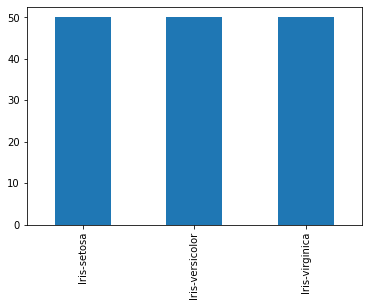

In [7]:
df['Species'].value_counts().plot.bar()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
## spliting data

In [13]:
x = df.iloc[:, :-1]
y = df.iloc[: , -1]

In [14]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [18]:
len(x_train), len(y_train)

(100, 100)

In [19]:
len(x_test), len(y_test)

(50, 50)

### model development

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
reg = MultinomialNB()

In [22]:
reg.fit(x_train, y_train)

MultinomialNB()

## checking validation report train and test

In [23]:
y_train_pred = reg.predict(x_train)

In [24]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [25]:
accuracy_score(y_train, y_train_pred)

0.82

In [26]:
confusion_matrix(y_train,y_train_pred)

array([[28,  3,  0],
       [ 0, 25, 10],
       [ 0,  5, 29]], dtype=int64)

In [27]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.76      0.71      0.74        35
           2       0.74      0.85      0.79        34

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.83      0.82      0.82       100



## test performances 

In [28]:
y_test_pred = reg.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [30]:
accuracy_score(y_test, y_test_pred)

0.92

In [32]:
confusion_matrix(y_train,y_train_pred)

array([[28,  3,  0],
       [ 0, 25, 10],
       [ 0,  5, 29]], dtype=int64)

In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.79      1.00      0.88        15
           2       1.00      0.88      0.93        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.94      0.92      0.92        50



In [37]:
import warnings
warnings.filterwarnings('ignore')

## checking with real data

In [39]:
sol = reg.predict([[1.2 , 2.4 ,5.6, 8.7, 8.3]])
sol = sol[0]
if sol == 0:
    print('Setosa Flower')
elif sol == 1:
    print('Versica Flower')
else:
    print('Verginica Flower')


Setosa Flower
